## pandas全称，Python data analysis library

pandas可以让Excel中的老大难问题变得简单、高效、稳健的解决。

它的优点如下：

1. 可从外部数据源获取大型数据集、处理统计数据、时序、交互式图标
2. 向量化和数据对齐



## DataFrame和Series

DataFrame(数据帧)和 Series(序列)是pandas的核心数据结构。

DataFrame和二维的Numpy数据类似， **但是它的行和列有对应的标签，并且每一列都可以存储不同的数据。**

从DataFrame中提取一行或一列时， 你会获得一个一维的Sereis。 

下图展示了pandas的Series和DataFrame


In [1]:
from PIL import Image

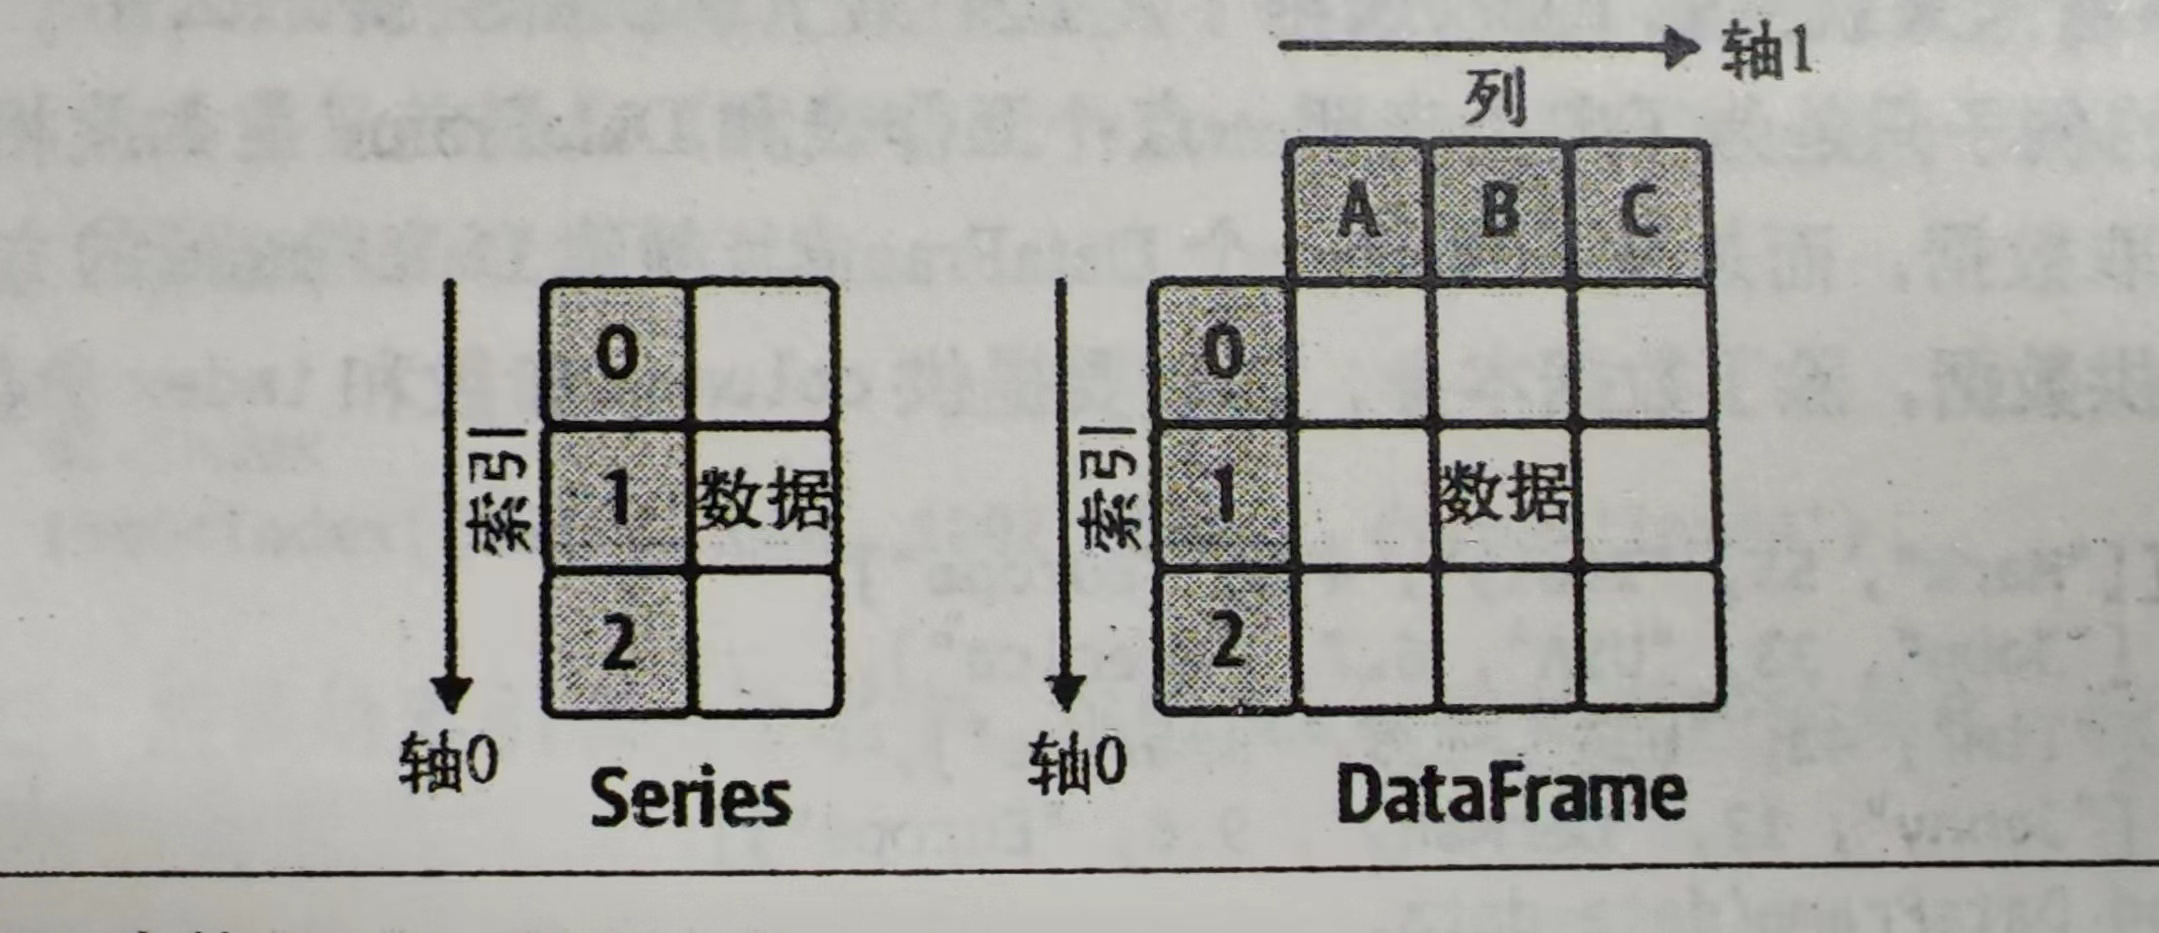

In [2]:
img = Image.open('../pic/pandas_dataframe.jpg')
img

上述这个和excel的工作表十分类似

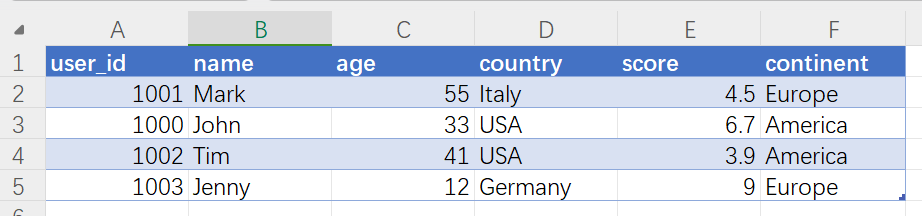

In [3]:
img = Image.open('../pic/pandas_xslx.png')
img

#### pandas打开excel

In [5]:
import pandas as pd



In [7]:
pd.read_excel('../ori_writer/xl/course_participants.xlsx', engine='openpyxl')


,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


#### 创建DataFrame
创建DataFrame的基础方法之一是： 利用嵌套列表来提供数据， 除了数据本身， 还需要提供columns参数和index参数，例子如下

In [8]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
        ["John", 33, "USA", 6.7, "America"],
        ["Tim", 41, "USA", 3.9, "America"],
        ["Jenny", 12, "Germany", 9.0, "Europe"]]
df = pd.DataFrame(data=data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001, 1000, 1002, 1003])
df

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


调用info方法可以或得DataFrame的一些基本信息。 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 1001 to 1003
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4 non-null      object 
 1   age        4 non-null      int64  
 2   country    4 non-null      object 
 3   score      4 non-null      float64
 4   continent  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 192.0+ bytes


In [10]:
#如果只对列的数据类型感兴趣， 可以只执行df.dtypes, 如果列含有字符串或者混合了不同数据类型， 它的数据类型就是object.
df.dtypes

name          object
age            int64
country       object
score        float64
continent     object
dtype: object

### 1.1 索引
DataFrame的行标签称之为**索引(index)**, 如果找不到一个有意义的索引，那么在构造DataFrame时可以直接省略， pandas会自动创建一个从0开始的整数索引。

In [11]:
df.index

Index([1001, 1000, 1002, 1003], dtype='int64')

如果可以的话， 应该给索引取一个名字， 更具Excel表格对应的列明， 我们可以给索引取名为user_id

In [12]:
df.index.name = 'user_id'

In [13]:
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


与数据库中的主键1不同，DataFrame的索引可以重复， 但是这种情况下查询速度可能变慢。要将索引还原成普通的列， 可以使用reset_index, 而ser_index可以设置一个新的索引。

如果在设置新索引时不想丢掉原本的索引，那么一定要先重置索引

In [14]:
# reset_iiindex会将索引还原成普通列， 同时用默认索引替换当前索引
# 最终结果就和刚从Excel文件中得到的DataFrame一样
df.reset_index()

,user_id,name,age,country,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [19]:
## reset_index会将user_id还原成普通列
# set_index会将'name'列设置成索引
# 这里创建的副本， 对真实的df没有影响
df.reset_index().set_index("name")  # 链式方法调用 


,user_id,age,country,score,continent
name,,,,,
Mark,1001,55,Italy,4.5,Europe
John,1000,33,USA,6.7,America
Tim,1002,41,USA,3.9,America
Jenny,1003,12,Germany,9.0,Europe


我们可以对df使用redinex方法更换索引

In [20]:
df.reindex([999,1000,1001,1004])

,name,age,country,score,continent
user_id,,,,,
999,NaN,NaN,NaN,NaN,NaN
1000,John,33.0,USA,6.7,America
1001,Mark,55.0,Italy,4.5,Europe
1004,NaN,NaN,NaN,NaN,NaN


这是实际工作中进行数据对齐的一个例子：reindex会接管所有能够匹配新索引的行， 而无法匹配的索引会引入含空值(NaN)的行。被忽略的索引对应的行会被直接丢弃。

In [21]:
# 对df使用sort_index可以按索引进行排序
df.sort_index()

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1001,Mark,55,Italy,4.5,Europe
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [22]:
# 对一列或多列进行排序，可以使用sort_values
# 先对continent排序，在对age排序。
df.sort_values(['continent', 'age'])

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe
1001,Mark,55,Italy,4.5,Europe


In [23]:
# 只对continent进行排序
df.sort_values('continent')

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1001,Mark,55,Italy,4.5,Europe
1003,Jenny,12,Germany,9.0,Europe


### 1.2 列


In [24]:
df.columns

Index(['name', 'age', 'country', 'score', 'continent'], dtype='object')

与可以对df的索引取名一样，我们可以为列取名

In [25]:
df.columns.name = 'properties'

In [26]:
df

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [28]:
# 如果不喜欢某些列的列名， 可以进行重命名
df.rename(columns={'name': 'First Name', 'age': 'Age'})

properties,First Name,Age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [29]:
# 如果想删除某些列或者某些行
df.drop(columns=['name', 'country'], index=[1000,1003])

properties,age,score,continent
user_id,,,
1001,55,4.5,Europe
1002,41,3.9,America


In [30]:
# DataFrame的列和索引都是由Index对象表示的， 通过转置(transpose)，DataFrame可以实现行和列的对调
df.T # df.transpose()的缩写

user_id,1001,1000,1002,1003
properties,,,,
name,Mark,John,Tim,Jenny
age,55,33,41,12
country,Italy,USA,USA,Germany
score,4.5,6.7,3.9,9.0
continent,Europe,America,America,Europe


In [31]:
# loc函数： 通过行索引中的具体值来取行数据
df.loc[:, ['age']]

properties,age
user_id,
1001,55
1000,33
1002,41
1003,12


## 2. 数据操作

在使用数据之前， 我们需要对其进行清理，使其更易于理解。我们分为3个部分去看：

1. 如何修改数据、如何处理缺失、重复的数据
2. 对DataFrame进行一些运算，看看如何处理文本数据
3. pandas什么时候回返回视图， 什么时候又会返回数据的副本

### 2.1 选取数据

我们有4种方法访问数据：
1. 使用标签选取数据
2. 通过位置选取数据
3. 使用布尔索引选取数据
4. 使用MultiIndex选取数据




#### 2.1.1 使用标签选取数据(loc)
语法 `df.loc[row_selection, column_selection]`

loc支持切片语法， 因此可以用冒号来选取所有的行或者列。

In [33]:
# 单个值
df.loc[1000, 'country']

'USA'

In [34]:
# 一列(一维)
df.loc[:,'country']

user_id
1001      Italy
1000        USA
1002        USA
1003    Germany
Name: country, dtype: object

In [35]:
# 一列(二维)
df.loc[:,['country']]

properties,country
user_id,
1001,Italy
1000,USA
1002,USA
1003,Germany


In [37]:
# 多列
df.loc[:, ['country', 'age']]

properties,country,age
user_id,,
1001,Italy,55
1000,USA,33
1002,USA,41
1003,Germany,12


In [39]:
# 列区间
df.loc[:,'name':'country']

properties,name,age,country
user_id,,,
1001,Mark,55,Italy
1000,John,33,USA
1002,Tim,41,USA
1003,Jenny,12,Germany


<font color=Yellow> **与Python切片内置语法不同的是， pandas在使用标签切片时候， 标签是包含首尾标签的** </font>

DataFrame和Series是有区别的。**即使只使用一列， DataFrame也是一个二维的数据结构， 而Series永远是一维的。**

DataFrame和Series都有索引，但只有DataFrame有列标题。

当你选取一列生成Series时， 列标题变成了Series的名称。

**列选择的捷径**

除了 `df.loc[:, column_selection]`还可以写成`df.loc[column_selection]`

#### 2.1.2 使用位置选取数据(iloc)
语法： `df.iloc[row_selection, column_selection]`

iloc的区间是标准的**半开半闭区间**

In [40]:
# 单个值
df.iloc[1,2]

'USA'

In [41]:
# 一列(一维)
df.iloc[:,2]

user_id
1001      Italy
1000        USA
1002        USA
1003    Germany
Name: country, dtype: object

In [42]:
# 一列(二维)
df.iloc[:,[2]]

properties,country
user_id,
1001,Italy
1000,USA
1002,USA
1003,Germany


In [43]:
# 多列
df.iloc[:,[2,1]]

properties,country,age
user_id,,
1001,Italy,55
1000,USA,33
1002,USA,41
1003,Germany,12


In [44]:
df

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


#### 2.1.3 使用布尔索引选取数据
布尔索引(boolean indexing)是借助只包含True和False的Series或DataFrame来选取一个DataFrame的子集。布尔Series可以用来选择DataFrame的特定列和行， 布尔DataFrame则用来选择整个DataFrame的某些值。 

可以将其视为Excel中的AutoFilter函数。


In [47]:
# 在pandas中只能使用 & | ~ 这三种
# 多个判定条件，一定要加括号
tf = (df['age']>40) & (df['country'] == 'USA')  
tf # 这个Sereis中只有True和False

user_id
1001    False
1000    False
1002     True
1003    False
dtype: bool

In [46]:
df.loc[tf, :]

properties,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America


In [48]:
tf = df.index > 1001
tf

array([False, False,  True,  True])

In [49]:
df.loc[tf,:]

properties,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [51]:
# 若果要判定是否数据存在某些对象， 在Series中需要使用isin方法

df.loc[df['country'].isin(['Italy', 'Germany']),:]


properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1003,Jenny,12,Germany,9.0,Europe


DataFrame还提供了一个特殊的语法，可以不使用loc的情况下，传递一整个布尔DataFrame作为参数， 语法： `df[boolean_df]`,

<font color="Yellow">该语法在DataFrame只包含数字时特别有用。</font>当提供这样一个布尔DataFrame作为参数时， 返回的DataFrame会在原DataFrame的基础上，把对应False的地方变成NaN。


In [52]:
rainfall = pd.DataFrame(data={"City 1": [300.1, 100.2],
                              "City 2": [400.3, 300.4],
                              "City 3": [1000.5, 1100.6]})
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [53]:
rainfall < 400

,City 1,City 2,City 3
0,True,False,False
1,True,True,False


In [55]:
rainfall[rainfall < 400]

,City 1,City 2,City 3
0,300.1,NaN,NaN
1,100.2,300.4,NaN


<font color='Yellow'>布尔值的用法经常用来排除某些值， 比如异常值.</font>

#### 2.1.4 使用MultiIndex选取数据

MultiIndex是一种多级索引，它可以将数据按层次分组， 这样可以更方柏霓地访问DataFrame的子集。 如果将continent和country一起设置为df的索引， 可以轻松通过某个大洲的名称来选取对应的所有行


In [56]:
df_multi = df.reset_index().set_index(["continent", "country"])
df_multi = df_multi.sort_index()
df_multi

properties         user_id   name  age  score
continent country                            
America   USA         1000   John   33    6.7
          USA         1002    Tim   41    3.9
Europe    Germany     1003  Jenny   12    9.0
          Italy       1001   Mark   55    4.5

In [57]:
df_multi.loc["Europe", :]

properties,user_id,name,age,score
country,,,,
Germany,1003,Jenny,12,9.0
Italy,1001,Mark,55,4.5


In [58]:
df_multi.loc[("Europe", "Italy"), :]

,properties,user_id,name,age,score
continent,country,,,,
Europe,Italy,1001,Mark,55,4.5


In [59]:
# 如果你想选择性地重置一部分MultiIndex， 你可以使用reset_index提供索引级别参数，索引级别从左到有从0开始
df_multi.reset_index(level=0)

properties,continent,user_id,name,age,score
country,,,,,
USA,America,1000,John,33,6.7
USA,America,1002,Tim,41,3.9
Germany,Europe,1003,Jenny,12,9.0
Italy,Europe,1001,Mark,55,4.5


### 2.2 设置数据
设置数据有以下几种
1. 通过标签或位置设置数据
2. 通过布尔索引设置数据
3. 通过替换值设置数据
4. 通过添加新列设置数据


#### 2.2.1 通过标签(loc)或位置(iloc)设置数据



In [61]:
# 修改某一个值
df2 = df.copy()
df2.loc[1000, 'name'] = "JOHN"
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,JOHN,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [62]:
# 修改多个值
df2.loc[[1000, 1001], 'score'] = [3,4]
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.0,Europe
1000,JOHN,33,USA,3.0,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


#### 2.2.2 通过布尔索引设置数据


In [65]:
# 假设你需要将所有来自美国且年龄再20以下的学院匿名
df2 = df.copy()

tf = (df2['age'] < 40) & (df2["country"] == 'USA')
df2.loc[tf, 'name'] = 'XXX'
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,XXX,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


#### 2.2.3 通过替换值设置数据


In [66]:
df2 = df.copy()
df2.replace('USA','U.S')

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,U.S,6.7,America
1002,Tim,41,U.S,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [83]:
# 如果只想在contoury列进行操作，可以进行
df2 = df.copy()
df2.replace({"age":{"33":"50" }})
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


### 2.4 缺失数据
pandas使用Numpy的np.nam代表缺失数据，显示为NaN。 

对于时间戳，则使用pd.NaT

对于文本， 使用None或者np.nan表示文本的值缺失



In [84]:
df2 = df.copy()
df2.loc[1000, 'score'] = None
df2.loc[1003,:] = None
df2

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,NaN,None


<font color='yellow'>如何缺失数据 </font>

In [89]:
df2.dropna()


properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1002,Tim,41.0,USA,3.9,America


In [90]:
# 如果只想移除所有值都缺失了的行， 那么可以使用how参数
df2.dropna(how='all')

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,NaN,America
1002,Tim,41.0,USA,3.9,America


In [91]:
# 显示哪些地方是none或者无效值
df2.isna()


properties,name,age,country,score,continent
user_id,,,,,
1001,False,False,False,False,False
1000,False,False,False,True,False
1002,False,False,False,False,False
1003,True,True,True,True,True


In [92]:
# 使用fillna来填补缺失的值

df2.fillna({'score': df2['score'].mean()})

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,4.2,America
1002,Tim,41.0,USA,3.9,America
1003,None,NaN,None,4.2,None


### 重复数据


In [93]:
# 清除country, continent二者都一样的， 只保留第一个出现的
df.drop_duplicates(['country', 'continent'])

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1003,Jenny,12,Germany,9.0,Europe


In [94]:
df 

properties,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [95]:
# 查看某个sereis是否是重复的
df['country'].is_unique

False

In [96]:
# 查看某个sereis的不重复的值
df['country'].unique()

array(['Italy', 'USA', 'Germany'], dtype=object)

In [97]:
# 查看哪些行时重复的

df['country'].duplicated()

user_id
1001    False
1000    False
1002     True
1003    False
Name: country, dtype: bool

In [100]:
# 找到重复行
df.loc[df['country'].duplicated(keep=False), :]

properties,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America


### 2.5 算术运算

和Numpy数组一样， DataFrame和Series也李永乐向量化技术

In [101]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [102]:
rainfall + 100

,City 1,City 2,City 3
0,400.1,500.3,1100.5
1,200.2,400.4,1200.6


不过pandas强大之处在于它的**自动数据对齐(data alignment)机制**： 当你对多个DataFrame使用算术运算符时， pandas会自动将它们按照列或者行索引对齐。

In [106]:
more_rainfall = pd.DataFrame(data=[[100, 200], [300, 400]],
                             index=[1, 2],
                             columns=["City 1", "City 4"])
more_rainfall

,City 1,City 4
1,100,200
2,300,400


In [107]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [108]:
rainfall + more_rainfall 

,City 1,City 2,City 3,City 4
0,NaN,NaN,NaN,NaN
1,200.2,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


**上述结果DataFrame的索引和列是两个DataFrame的并集: 两个DataFrame中都有的字段会被相加(200.2 = 100.2 + 100), 而其他的部分会显示未NaN。**

在Excel中，出现这样的情况， 会将空单元格自动变成0，要让pandas达到相同的条件，这边需要使用add方法

In [109]:
rainfall.add(more_rainfall, fill_value=0)

,City 1,City 2,City 3,City 4
0,300.1,400.3,1000.5,NaN
1,200.2,300.4,1100.6,200.0
2,300.0,NaN,NaN,400.0


In [112]:
# 当算式的操作数是一个DataFrame和一个Series时， 默认情况Series会按照索引进行广播

t = rainfall.loc[1, :]
t

City 1     100.2
City 2     300.4
City 3    1100.6
Name: 1, dtype: float64

In [113]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [114]:
rainfall + t

,City 1,City 2,City 3
0,400.3,700.7,2101.1
1,200.4,600.8,2201.2


In [ ]:
# 若按列加上一个series, 则需要再调用add时，显式的提供axis参数

In [115]:
rainfall.loc[:,'City 2']

0    400.3
1    300.4
Name: City 2, dtype: float64

In [116]:
rainfall.add(rainfall.loc[:, 'City 2'], axis=0)

,City 1,City 2,City 3
0,700.4,800.6,1400.8
1,400.6,600.8,1401.0


In [117]:
rainfall

,City 1,City 2,City 3
0,300.1,400.3,1000.5
1,100.2,300.4,1100.6


In [118]:
rainfall.add(rainfall.loc[:, 'City 2'], axis=1)

,City 1,City 2,City 3,0,1
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN


### 2.6 处理文本列


In [119]:
users = pd.DataFrame(data=[" mArk ", "JOHN  ", "Tim", " jenny"],
                     columns=["name"])
users

,name
0,mArk
1,JOHN
2,Tim
3,jenny


In [120]:
users_cleaned = users.loc[:, "name"].str.strip().str.capitalize() # strip 去除字段的空白， capitalize首字母大写
users_cleaned

0     Mark
1     John
2      Tim
3    Jenny
Name: name, dtype: object

In [121]:
# 找以J开头的名字
users_cleaned.str.startswith('J')

0    False
1     True
2    False
3     True
Name: name, dtype: bool